For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
(Null hypothesis) H0: Has not increased
H1: Has increased

True positive - Determine that it has gone up.
True negative - Find that it has not changed.

(False Positive) Type I error: Determine that it increased or stayed the same and it didnt.
Type II error: Say that it decreased or stayed the same when it actually increased.

Would use a paired T test

Is the website redesign any good?
H0 : No change or decreased
H1: Increase in visits since redesigned website

True positive - It increased
True negative- It decreased or stayed the same.

Type I error : Determine it actually decreased or stayed the same instead of increased.
Type II error : Determine that it actually increased instead of decreased.

Would use independent sample T-test because easier to control.

Is our television ad driving more sales?
H0 : The television ad has made no difference in sales.
H1: The ad has increased more sales.

True positive - It increased
True negative - It decreased or stayed the same.

Type I error - Increased and it has. 
Type II error - Determine that it actually decreased when it actually increased. 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?
-Average time (numberic continous values) for two different groups (categories)
- One sample or two sample?
-One tailed or two tailed?

scipy.stats.ttest_ind_from_stats(mean1, sdev1, nobs1, mean2, sdev2, nobs2, equal_var = False)

In [119]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
import pydataset

Form a hypothesis:

h_0:average time to sell at office 1 == average time to sell at office 2


h_a: average time to sell at office 1 != average time to sell at office 2

In [17]:
alpha = .05

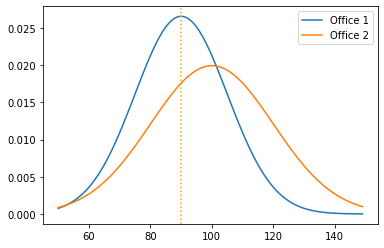

In [18]:
#visualize distributions


x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls = ":", color = "orange")

plt.legend()

In [19]:
stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

Load the mpg dataset and use it to answer the following questions:

In [20]:
mpg = data('mpg')

In [21]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [22]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# H_o : # There is no difference in fuel - efficiency in cars from 2008 to 1999.
# H_A : There is a difference in same cars.

In [23]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


<AxesSubplot:>

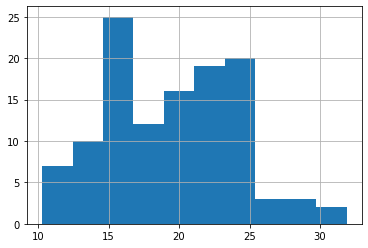

In [24]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe


#plot
fe_2008.hist()

<AxesSubplot:>

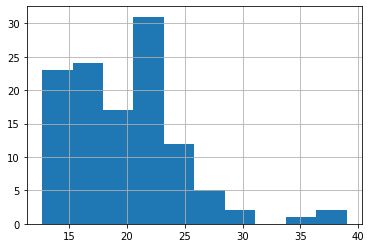

In [25]:
fe_1999.hist()

In [26]:
# (N>30,we we meet normality condition, not an issue due to sample size)

fe_2008.count(), fe_1999.count()

(117, 117)

In [27]:
# Variance is the same 


fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [28]:
# # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_2008, fe_1999)

# high p-value suggests that the populations have equal variances

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [29]:
# calculate t-statistic and p value

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [30]:
if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Fail to reject null


In [31]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

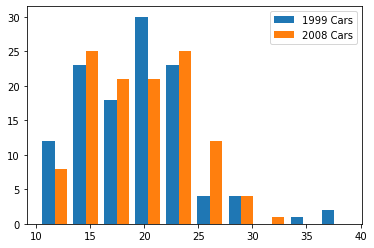

In [32]:
plt.hist([fe_1999, fe_2008], label=['1999 Cars', '2008 Cars'])
plt.legend()

In [33]:
# Are compact cars more fuel-efficient than the average car?
# H0 : MPG for compact cars is <= the mpg for average car
# HA: MPG for compact cars is > mpg for average car 

In [34]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [35]:
# Do manual cars get better gas mileage than automatic cars?
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [36]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [37]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

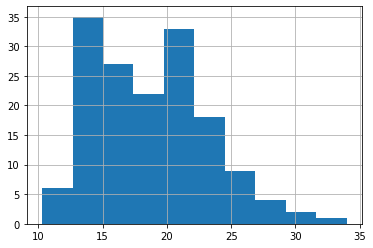

In [38]:
fe_auto.hist()

<AxesSubplot:>

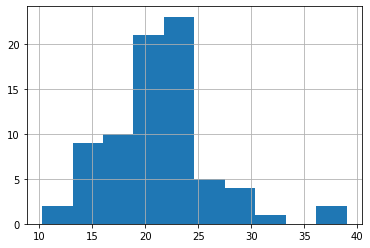

In [39]:
fe_manual.hist()

In [40]:
# look at variance
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [41]:
# Levene Test
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [42]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [43]:
fe_manual.mean(), fe_auto.mean()

(21.629228592155194, 18.583199507835747)

In [44]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Manual transmission gets better fuel effiency')

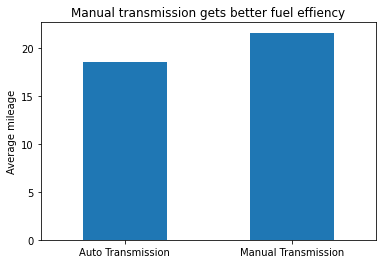

In [45]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission gets better fuel effiency')

In [46]:
# this is not part of the lesson, just showing how to use ENV properly
url = env.get_db_url('employees')
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)

salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [47]:
telco = pd.read_csv("telco.csv")
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


${H_O}$: There is no linear relation between tenure and monthly charges.

${H_1}$: There is a linear relation between tenure and monthly charges.




---------------------------------------------------------------------



${H_O}$: There is no linear relation between tenure and total charges.

${H_1}$: There is a linear relation between tenure and total charges.

p= 1.2811368994929208e-98
r= 0.2471848922499011
Reject null


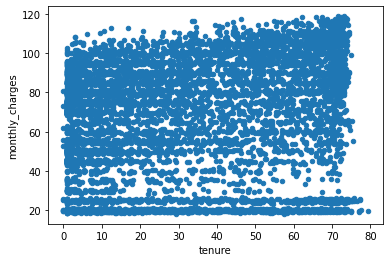

In [56]:
r, p = stats.pearsonr(telco.monthly_charges, telco.tenure)
telco.plot.scatter(y='monthly_charges', x='tenure')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

p= 1.2811368994929208e-98
r= 0.2471848922499011
Reject null


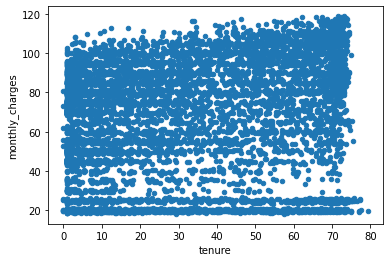

In [81]:
r, p = stats.pearsonr(telco.monthly_charges, telco.tenure)
telco.plot.scatter(y='monthly_charges', x='tenure')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

In [87]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   int64  
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   int64  
 6   internet_service   7038 non-null   int64  
 7   contract_type      7038 non-null   int64  
 8   payment_type       7038 non-null   object 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 769.8+ KB


In [89]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   int64  
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   int64  
 6   internet_service   7038 non-null   int64  
 7   contract_type      7038 non-null   int64  
 8   payment_type       7038 non-null   object 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 769.8+ KB


p= 0.0
r= 0.8258191824783714
Reject null


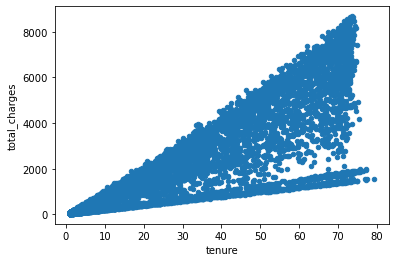

In [93]:
df.plot.scatter(y='total_charges', x='tenure')
r, p = stats.pearsonr(df.tenure, df.total_charges)
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

## Controlling for phone and internet services

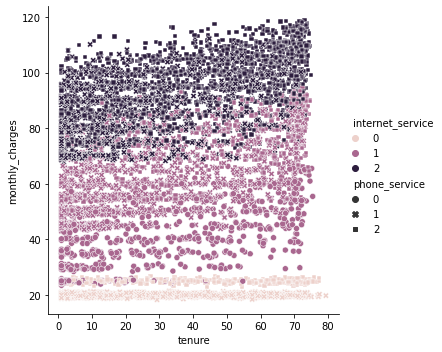

In [99]:
sns.relplot(data=df, y='monthly_charges', x='tenure', hue='internet_service', style='phone_service')

Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?
Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [102]:
query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [105]:
salaries = pd.read_sql(query, url)
salaries.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


${H_O}$: There is no linear relation between tenure and salary.

${H_1}$: There is a linear relation between tenure and salary.

p= 0.0
r= 0.30646256131860894
Reject null


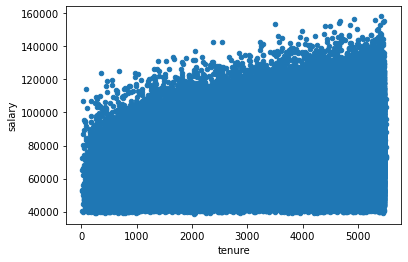

In [107]:
r, p = stats.pearsonr(salaries.salary, salaries.tenure)
salaries.plot.scatter(y='salary', x='tenure')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

In [109]:
## how to grab titles
query = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''
employees_with_titles = pd.read_sql(query, url)
employees_with_titles.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


${H_O}$: There is no linear relation between tenure and titles.

${H_1}$: There is a linear relation between tenure and titles.

p= 0.0
r= 0.2665989299136427
Reject null


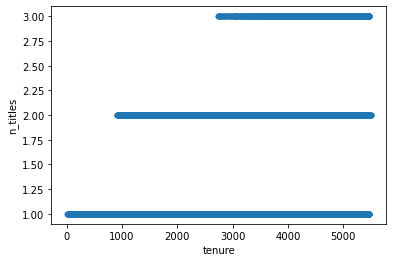

In [115]:
r, p = stats.pearsonr(employees_with_titles.n_titles, employees_with_titles.tenure)
employees_with_titles.plot.scatter(y='n_titles', x='tenure')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

In [123]:
sleep = pydataset.data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


Is there a relationship between days and reaction time?

p= 9.894096322214812e-15
r= 0.5352302262650253
Reject null


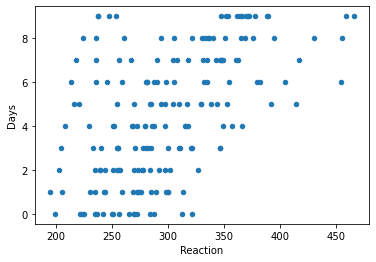

In [130]:
r, p = stats.pearsonr(sleep.Days, sleep.Reaction)
sleep.plot.scatter(y='Days', x='Reaction')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')